<a href="https://colab.research.google.com/github/Mahbub511/Influenza-A-Virus-Mutation-Predictor/blob/main/Final_Thesis_Implementation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [ ]:
#import Datasets
df = pd.read_csv('/content/drive/MyDrive/ML Dataset/M1(1996-2021).fa.csv')
df1 = pd.read_csv('/content/drive/MyDrive/ML Dataset/M2_Mutation_2000_to_2022_anyHA_NA.csv')

In [ ]:
df.head()

,Unnamed: 0,Accession,sequence,strain,protien,serotype,mutation
0,0,ADX98961,MSLLTEVETYVLSIIPSGPLKAEIAQRLESVFAGKNTDLEALMEWL...,A/Aalborg/INS132/2009,M1,H1N1,S31N
1,1,ADH01959,MSLLTEVETYVLSIIPSGPLKAEIAQRLESVFAGKNTDLEALMEWL...,A/Aalborg/INS133/2009,M1,H1N1,S31N
2,2,ADX98793,MSLLTEVETYVLSIIPSGPLKAEIAQRLESVFAGKNTDLEALMEWL...,A/Aalborg/INS282/2009,M1,H1N1,S31N
3,3,ADN05227,MSLLTEVETYVLSIIPSGPLKAEIAQRLESVFAGKNTDLEALMEWL...,A/Aalborg/INS283/2009,M1,H1N1,S31N
4,4,ADG42154,MSLLTEVETYVLSIIPSGPLKAEIAQRLESVFAGKNTDLEALMEWL...,A/Aarhus/INS116/2009,M1,H1N1,S31N


In [ ]:
df1.head()

,Unnamed: 0,Accession,sequence,strain,protien,serotype,mutation
0,0,ADX98962,MSLLTEVETPTRSEWECRCSDSSDPLVIAANIIGILHLILWITDRL...,A/Aalborg/INS132/2009,M2,H1N1,S31N
1,1,ADH01960,MSLLTEVETPTRSEWECRCSDSSDPLIIAANIIGILHLILWITDRL...,A/Aalborg/INS133/2009,M2,H1N1,S31N
2,2,ADX98794,MSLLTEVETPTRSGWECRCSDSSDPLVIAANIIGILHLILWITDRL...,A/Aalborg/INS282/2009,M2,H1N1,S31N
3,3,ADN05228,MSLLTEVETPTRNEWECRCSDSSDPLVIAANIIGILHLILWITDRL...,A/Aalborg/INS283/2009,M2,H1N1,S31N
4,4,ADG42155,MSLLTEVETPTRSEWECRCSDSSDPLVIAANIIGILHLILWITDRL...,A/Aarhus/INS116/2009,M2,H1N1,S31N


In [ ]:
protein_seq = df[['Accession','sequence', 'serotype', 'mutation']]

In [ ]:
protein_seq1 = df1[['Accession','sequence', 'serotype', 'mutation']]

In [ ]:
protein_seq.head()

,Accession,sequence,serotype,mutation
0,ADX98961,MSLLTEVETYVLSIIPSGPLKAEIAQRLESVFAGKNTDLEALMEWL...,H1N1,S31N
1,ADH01959,MSLLTEVETYVLSIIPSGPLKAEIAQRLESVFAGKNTDLEALMEWL...,H1N1,S31N
2,ADX98793,MSLLTEVETYVLSIIPSGPLKAEIAQRLESVFAGKNTDLEALMEWL...,H1N1,S31N
3,ADN05227,MSLLTEVETYVLSIIPSGPLKAEIAQRLESVFAGKNTDLEALMEWL...,H1N1,S31N
4,ADG42154,MSLLTEVETYVLSIIPSGPLKAEIAQRLESVFAGKNTDLEALMEWL...,H1N1,S31N


In [ ]:
protein_seq1.head()

,Accession,sequence,serotype,mutation
0,ADX98962,MSLLTEVETPTRSEWECRCSDSSDPLVIAANIIGILHLILWITDRL...,H1N1,S31N
1,ADH01960,MSLLTEVETPTRSEWECRCSDSSDPLIIAANIIGILHLILWITDRL...,H1N1,S31N
2,ADX98794,MSLLTEVETPTRSGWECRCSDSSDPLVIAANIIGILHLILWITDRL...,H1N1,S31N
3,ADN05228,MSLLTEVETPTRNEWECRCSDSSDPLVIAANIIGILHLILWITDRL...,H1N1,S31N
4,ADG42155,MSLLTEVETPTRSEWECRCSDSSDPLVIAANIIGILHLILWITDRL...,H1N1,S31N


In [ ]:
model = protein_seq.set_index('Accession')

In [ ]:
model1 = protein_seq1.set_index('Accession')

In [ ]:
model1.head()

,sequence,serotype,mutation
Accession,,,
ADX98962,MSLLTEVETPTRSEWECRCSDSSDPLVIAANIIGILHLILWITDRL...,H1N1,S31N
ADH01960,MSLLTEVETPTRSEWECRCSDSSDPLIIAANIIGILHLILWITDRL...,H1N1,S31N
ADX98794,MSLLTEVETPTRSGWECRCSDSSDPLVIAANIIGILHLILWITDRL...,H1N1,S31N
ADN05228,MSLLTEVETPTRNEWECRCSDSSDPLVIAANIIGILHLILWITDRL...,H1N1,S31N
ADG42155,MSLLTEVETPTRSEWECRCSDSSDPLVIAANIIGILHLILWITDRL...,H1N1,S31N


In [ ]:
model.info()

<class 'pandas.core.frame.DataFrame'>
Index: 110884 entries, ADX98961 to AKM15277
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   sequence  110884 non-null  object
 1   serotype  110388 non-null  object
 2   mutation  81760 non-null   object
dtypes: object(3)
memory usage: 3.4+ MB


In [ ]:
result=model.append(model1)

In [ ]:
result.info()

<class 'pandas.core.frame.DataFrame'>
Index: 184973 entries, ADX98961 to BAM84169
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   sequence  184973 non-null  object
 1   serotype  184229 non-null  object
 2   mutation  133685 non-null  object
dtypes: object(3)
memory usage: 5.6+ MB


In [ ]:
#displaying null values per coloumn
result.isnull().sum()

sequence        0
serotype      744
mutation    51288
dtype: int64

In [ ]:
# Look at classification type counts
counts = result.mutation.value_counts()
print(counts)

S31N              122161
V27A S31N          10754
V27A                 389
L26F S31N            210
H9N2                  36
A30T                  35
L26F                  30
A30T S31N             28
L26F V27A S31N        27
G34E                   9
S31N G34E              4
4                      2
Name: mutation, dtype: int64


In [ ]:
#storing string value in stead of NA 
result.fillna('non mutant', inplace=True)

In [ ]:
# Check NA counts again
result.isnull().sum()

sequence    0
serotype    0
mutation    0
dtype: int64

In [ ]:
nonMutant = result.loc[result['mutation'] == 'non mutant']

In [ ]:
S31N = result.loc[result['mutation'] == 'S31N']

In [ ]:
V27AS31N = result.loc[result['mutation'] == 'V27A S31N']

In [ ]:
nonMutant.reset_index()

,Accession,sequence,serotype,mutation
0,AGB13121,LVCATCEQIADSQHRSHRQMATTTNPLIRHENRMVLASTTEKAMEQ...,unknown,non mutant
1,AGB13126,MSLLTEVETYVLSIIPSGPLKAEIAQRLESVFAGKNTDLEALMEWL...,H1N1,non mutant
2,AHZ21123,MSLLTEVETYVLSIVPSGPLKAEIAQRLEDVFAGKNTDLEALMEWL...,H11N2,non mutant
3,AHZ21099,MSLLTEVETYVLSIVPSGPLKAEIAQRLEDVFAGKNTDLEALMEWL...,H11N2,non mutant
4,AHZ21111,MSLLTEVETYVLSIVPSGPLKAEIAQRLEDVFAGKNTDLEALMEWL...,H11N2,non mutant
...,...,...,...,...
51283,AKM15278,MSLLTEVETPTRNGWECKCNGSSDPLVIAASIIGILHLILWILDRL...,H3N6,non mutant
51284,BAM84136,MSLLTEVETPTRNEWECRCSDSSDPLIVAASIIGILHLILWILDRL...,H5N1,non mutant
51285,BAM84147,MSLLTEVETPTRNEWECRCSDSSDPLIVAASIIGILHLILWILDRL...,H5N1,non mutant
51286,BAM84158,MSLLTEVETPTRNEWECRCSDSSDPLIVAASIIGILHLILWILDRL...,H5N1,non mutant


In [ ]:
nonMutatntpart1 = nonMutant[0:5377]

In [ ]:
nonMutatntpart2 = nonMutant[40000:45377]

In [ ]:
balancenonMutant = nonMutatntpart1.append(nonMutatntpart2)

In [ ]:
# Look at classification type counts
counts = balancenonMutant.mutation.value_counts()
print(counts)

non mutant    10754
Name: mutation, dtype: int64


In [ ]:
S31N.reset_index()

,Accession,sequence,serotype,mutation
0,ADX98961,MSLLTEVETYVLSIIPSGPLKAEIAQRLESVFAGKNTDLEALMEWL...,H1N1,S31N
1,ADH01959,MSLLTEVETYVLSIIPSGPLKAEIAQRLESVFAGKNTDLEALMEWL...,H1N1,S31N
2,ADX98793,MSLLTEVETYVLSIIPSGPLKAEIAQRLESVFAGKNTDLEALMEWL...,H1N1,S31N
3,ADN05227,MSLLTEVETYVLSIIPSGPLKAEIAQRLESVFAGKNTDLEALMEWL...,H1N1,S31N
4,ADG42154,MSLLTEVETYVLSIIPSGPLKAEIAQRLESVFAGKNTDLEALMEWL...,H1N1,S31N
...,...,...,...,...
122156,ALT19481,MSLLTEVETPTRTEWECRCSDSSDPLVVAANIIGILHLILWILDRL...,H5N2,S31N
122157,QGH81245,MSLLTEVETLTRTGWECNCSGSSDPLVVAANIIGILHLILWILDRL...,H7N9,S31N
122158,AFK13907,MSLLTEVETPIRNEWGCRCNDSSDPLVVAANIIGILHLILWILDRL...,H3N2,S31N
122159,AFK13911,MSLLTEVETPIRNEWGCRCNDSSDPLVVAANIIGILHLILWILDRL...,H3N2,S31N


In [ ]:
s31none = S31N[0:5377]

In [ ]:
s31two = S31N[40000:45377]

In [ ]:
balanceS31N = s31none.append(s31two)

In [ ]:
# Look at classification type counts
counts = balanceS31N.mutation.value_counts()
print(counts)

S31N    10754
Name: mutation, dtype: int64


In [ ]:
balanceData=balancenonMutant.append(balanceS31N)

In [ ]:
balancedData=balanceData.append(V27AS31N)

In [ ]:
# Look at classification type counts
counts = balancedData.mutation.value_counts()
print(counts)

non mutant    10754
S31N          10754
V27A S31N     10754
Name: mutation, dtype: int64


In [ ]:
#value count of each type of muation
print(counts['non mutant'])
print(counts['S31N'])
print(counts['V27A S31N'])
# print(counts['E627K'])
# print(counts['V27A'])
# print(counts['A30T'])
# print(counts['N294S'])
# print(counts['L26F'])

10754
10754
10754


In [ ]:
max_length=balancedData["sequence"].str.len().max()
max_length

252

In [ ]:
# Get classification types where counts are over 1000
#types = np.asarray(counts[(counts > 1000)].index)
types=['non mutant'
,'S31N','V27A S31N']
#,'E627K'
#,'V27A'
#,'A30T'
#,'N294S'
#,'L26F'
# Filter dataset's records for classification types > 1000
data = balancedData[balancedData.mutation.isin(types)]


print(types)
print('%d is the number of records in the final filtered dataset' %data.shape[0])

['non mutant', 'S31N', 'V27A S31N']
32262 is the number of records in the final filtered dataset


In [ ]:
train=data
a=train.mutation.unique()
l=len(train.mutation.unique())
print(a)

['non mutant' 'S31N' 'V27A S31N']


In [ ]:
for i in range (l):
    train.mutation = train.mutation.replace(a[i], i)

In [ ]:
train.mutation.head()

Accession
AGB13121    0
AGB13126    0
AHZ21123    0
AHZ21099    0
AHZ21111    0
Name: mutation, dtype: int64

In [ ]:
train.mutation.value_counts()

0    10754
1    10754
2    10754
Name: mutation, dtype: int64

In [ ]:
#df = train
#df.mutation = df.mutation.astype(int)
finalData = train
finalData.mutation = finalData.mutation.astype(int)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from sklearn.feature_extraction.text import TfidfVectorizer
from keras.layers import SpatialDropout1D
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import precision_recall_curve
from sklearn.model_selection import GridSearchCV
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import Bidirectional
from keras.layers import GlobalMaxPool1D
from tensorflow.keras.utils import plot_model
from keras.layers.embeddings import Embedding
from keras.preprocessing import sequence
from keras.callbacks import EarlyStopping
from sklearn.feature_selection import RFE
import re

In [ ]:
# The maximum number of words to be used. (most frequent)
MAX_NB_WORDS = 50000
# Max number of words in each complaint.
MAX_SEQUENCE_LENGTH = 250
# This is fixed.
EMBEDDING_DIM = 100
tokenizer = Tokenizer(num_words=MAX_NB_WORDS, filters='!"#$%&()*+,-./:;<=>?@[\]^_`{|}~।', lower=False)
tokenizer.fit_on_texts(finalData.sequence.values)
word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

Found 3332 unique tokens.


In [ ]:
X = tokenizer.texts_to_sequences(finalData.sequence.values)
X = pad_sequences(X, maxlen=MAX_SEQUENCE_LENGTH)
print('Shape of data tensor:', X.shape)

Shape of data tensor: (32262, 250)


In [ ]:
Y = pd.get_dummies(finalData.mutation).values
print('Shape of label tensor:', Y.shape)

Shape of label tensor: (32262, 3)


In [ ]:
train_features, test_features, train_labels, test_labels = train_test_split(X, Y, test_size=.10)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 250, 100)          5000000   
                                                                 
 lstm (LSTM)                 (None, 64)                42240     
                                                                 
 dense (Dense)               (None, 256)               16640     
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 3)                 771       
                                                                 
Total params: 5,059,651
Trainable params: 5,059,651
Non-trainable params: 0
_________________________________________________________________
None


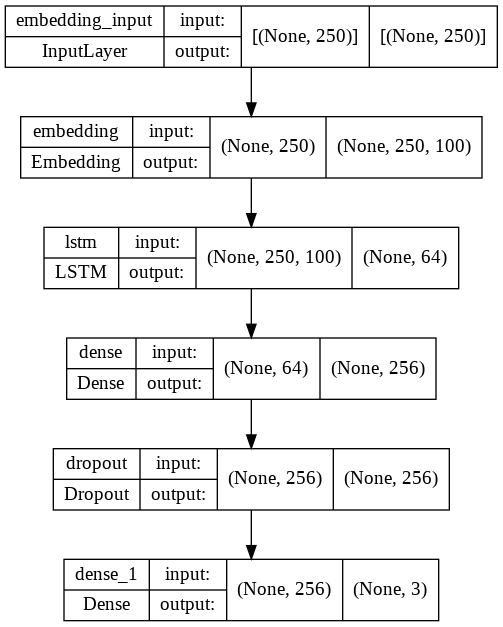

In [ ]:
model = Sequential()
model.add(Embedding(MAX_NB_WORDS, EMBEDDING_DIM, input_length=X.shape[1]))
model.add(LSTM(64))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(l, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())

plot_model(model,'qw.png',show_shapes=True)

In [ ]:
epochs = 3
batch_size = 128

In [ ]:
history = model.fit(train_features, train_labels, epochs=epochs, batch_size=batch_size,validation_split=0.1,callbacks=[EarlyStopping(monitor='val_loss', patience=3, min_delta=0.0001)])

Epoch 1/3
205/205 [==============================] - 100s 476ms/step - loss: 0.4355 - accuracy: 0.8432 - val_loss: 0.1791 - val_accuracy: 0.9380
Epoch 2/3
205/205 [==============================] - 96s 469ms/step - loss: 0.1268 - accuracy: 0.9694 - val_loss: 0.1628 - val_accuracy: 0.9415
Epoch 3/3
205/205 [==============================] - 96s 469ms/step - loss: 0.0994 - accuracy: 0.9759 - val_loss: 0.1571 - val_accuracy: 0.9425


In [ ]:
accr = model.evaluate(test_features,test_labels)
print('Test set\n  Loss: {:0.3f}\n  Accuracy: {:0.3f}'.format(accr[0],accr[1]))

101/101 [==============================] - 4s 36ms/step - loss: 0.1784 - accuracy: 0.9368
Test set
  Loss: 0.178
  Accuracy: 0.937


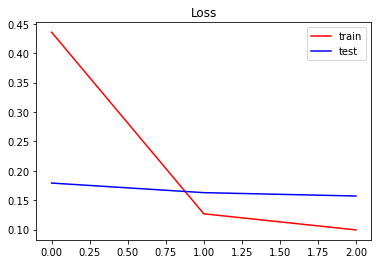

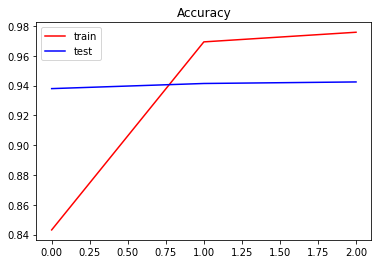

In [ ]:
from matplotlib import pyplot as plt
plt.title('Loss')
plt.plot(history.history['loss'],'r', label='train')
plt.plot(history.history['val_loss'],'b', label='test')
plt.legend()
plt.show()
plt.title('Accuracy')
plt.plot(history.history['accuracy'],'r', label='train')
plt.plot(history.history['val_accuracy'],'b', label='test')
plt.legend()
plt.show()

In [ ]:
predicted_classes = model.predict(test_features)
predicted_classes = np.argmax(np.round(predicted_classes),axis=1)
test_Y = np.argmax(np.round(test_labels),axis=1)

In [ ]:
predicted_classes.shape, test_labels.shape
print(test_labels.shape)

(3227, 3)


In [ ]:
test_Y=[]
for i in range (3227):
    for j in range (3):
        if(test_labels[i][j]==1):
            test_Y.append(j)
print(len(test_Y))

3227


In [ ]:
from sklearn.metrics import classification_report
target_names = ["Class {}".format(i) for i in range(3)]
print(classification_report(test_Y, predicted_classes))

              precision    recall  f1-score   support

           0       0.91      0.97      0.94      1084
           1       0.93      0.95      0.94      1078
           2       0.99      0.91      0.95      1065

    accuracy                           0.94      3227
   macro avg       0.94      0.94      0.94      3227
weighted avg       0.94      0.94      0.94      3227



Automatically created module for IPython interactive environment
Confusion matrix, without normalization
[[ 918   64   30]
 [  28 1006   16]
 [  32   54 1079]]
Normalized confusion matrix
[[0.91 0.06 0.03]
 [0.03 0.96 0.02]
 [0.03 0.05 0.93]]


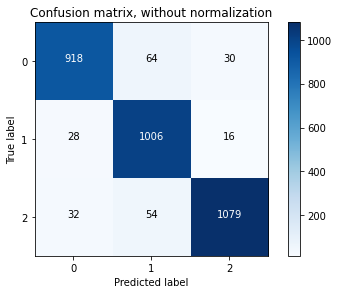

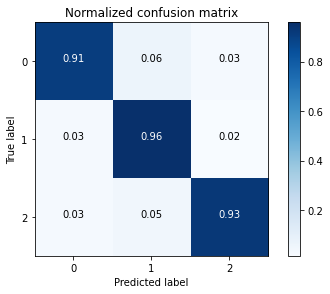

In [ ]:
print(__doc__)

import itertools
import numpy as np
import matplotlib.pyplot as plt

from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix


class_names = name

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=0)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Compute confusion matrix
cnf_matrix = confusion_matrix(test_Y, predicted_classes)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

In [ ]:
train.mutation.value_counts()

0    10754
1    10754
2    10754
Name: mutation, dtype: int64

In [ ]:
finalData = train
finalData.mutation = finalData.mutation.astype(int)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from sklearn.feature_extraction.text import TfidfVectorizer
from keras.layers import SpatialDropout1D
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import precision_recall_curve
from sklearn.model_selection import GridSearchCV
from keras.models import Sequential
from keras.layers import Dense
#from keras.layers import CNN 
from tensorflow.keras.layers import Conv1D
from tensorflow.keras.layers import MaxPooling1D
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from keras.layers import Dropout
from keras.layers import Bidirectional
from keras.layers import GlobalMaxPool1D
from tensorflow.keras.utils import plot_model
from keras.layers.embeddings import Embedding
from keras.preprocessing import sequence
from keras.callbacks import EarlyStopping
from sklearn.feature_selection import RFE
import re

In [ ]:
# The maximum number of words to be used. (most frequent)
MAX_NB_WORDS = 50000
# Max number of words in each complaint.
MAX_SEQUENCE_LENGTH = 250
# This is fixed.
EMBEDDING_DIM = 100
tokenizer = Tokenizer(num_words=MAX_NB_WORDS, filters='!"#$%&()*+,-./:;<=>?@[\]^_`{|}~।', lower=False)
tokenizer.fit_on_texts(finalData.sequence.values)
word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

Found 3332 unique tokens.


In [ ]:
X = tokenizer.texts_to_sequences(finalData.sequence.values)
X = pad_sequences(X, maxlen=MAX_SEQUENCE_LENGTH)
print('Shape of data tensor:', X.shape)

Shape of data tensor: (32262, 250)


In [ ]:
Y = pd.get_dummies(finalData.mutation).values
print('Shape of label tensor:', Y.shape)

Shape of label tensor: (32262, 3)


In [ ]:
train_features, test_features, train_labels, test_labels = train_test_split(X, Y, test_size=.10)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 250, 100)          5000000   
                                                                 
 conv1d (Conv1D)             (None, 250, 128)          51328     
                                                                 
 max_pooling1d (MaxPooling1D  (None, 125, 128)         0         
 )                                                               
                                                                 
 conv1d_1 (Conv1D)           (None, 125, 64)           32832     
                                                                 
 max_pooling1d_1 (MaxPooling  (None, 62, 64)           0         
 1D)                                                             
                                                                 
 flatten (Flatten)           (None, 3968)             

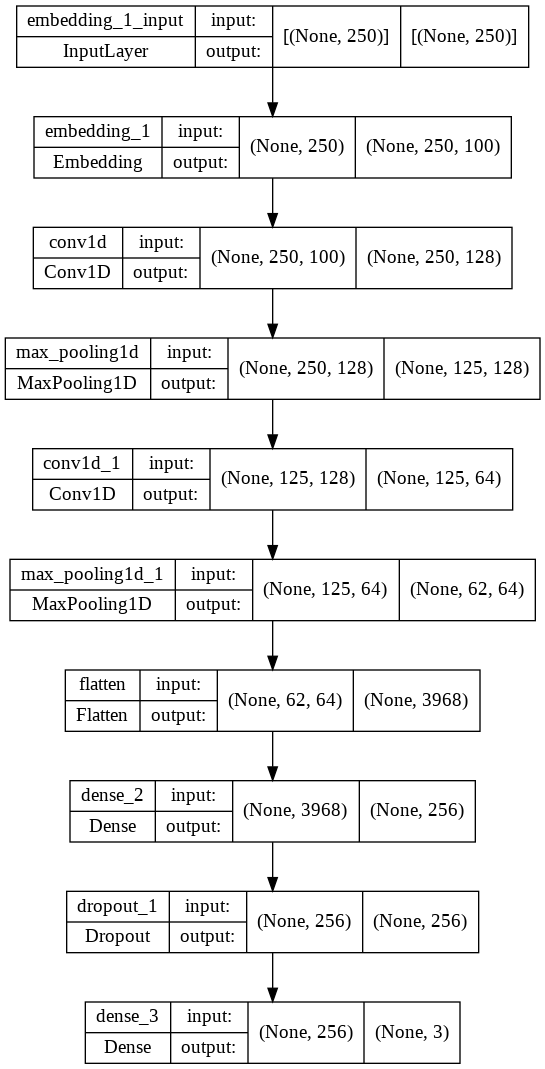

In [ ]:
model = Sequential()
model.add(Embedding(MAX_NB_WORDS, EMBEDDING_DIM, input_length=X.shape[1]))
#model.add(Conv1D(filters=256, kernel_size=4, padding='same', activation='relu'))
#model.add(MaxPooling1D(pool_size=2))
model.add(Conv1D(filters=128, kernel_size=4, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Conv1D(filters=64, kernel_size=4, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=2))
#model.add(Conv1D(filters=32, kernel_size=4, padding='same', activation='relu'))
#model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(l, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())

plot_model(model,'qw1.png',show_shapes=True)

In [ ]:
epochs = 3
batch_size = 128

In [ ]:
history = model.fit(train_features, train_labels, epochs=epochs, batch_size=batch_size,validation_split=0.1,callbacks=[EarlyStopping(monitor='val_loss', patience=3, min_delta=0.0001)])

Epoch 1/3
205/205 [==============================] - 87s 421ms/step - loss: 0.4174 - accuracy: 0.8268 - val_loss: 0.1925 - val_accuracy: 0.9360
Epoch 2/3
205/205 [==============================] - 87s 423ms/step - loss: 0.1253 - accuracy: 0.9672 - val_loss: 0.1884 - val_accuracy: 0.9390
Epoch 3/3
205/205 [==============================] - 86s 418ms/step - loss: 0.0983 - accuracy: 0.9757 - val_loss: 0.2004 - val_accuracy: 0.9356


In [ ]:
accr = model.evaluate(test_features,test_labels)
print('Test set\n  Loss: {:0.3f}\n  Accuracy: {:0.3f}'.format(accr[0],accr[1]))

101/101 [==============================] - 3s 29ms/step - loss: 0.1924 - accuracy: 0.9300
Test set
  Loss: 0.192
  Accuracy: 0.930


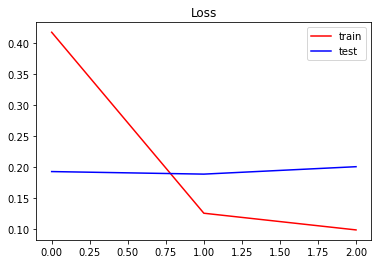

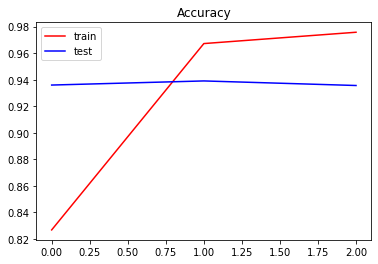

In [ ]:
from matplotlib import pyplot as plt
plt.title('Loss')
plt.plot(history.history['loss'],'r', label='train')
plt.plot(history.history['val_loss'],'b', label='test')
plt.legend()
plt.show()
plt.title('Accuracy')
plt.plot(history.history['accuracy'],'r', label='train')
plt.plot(history.history['val_accuracy'],'b', label='test')
plt.legend()
plt.show()

In [ ]:
predicted_classes = model.predict(test_features)
predicted_classes = np.argmax(np.round(predicted_classes),axis=1)
test_Y = np.argmax(np.round(test_labels),axis=1)

In [ ]:
predicted_classes.shape, test_labels.shape
print(test_labels.shape)

(3227, 3)


In [ ]:
test_Y=[]
for i in range (3227):
    for j in range (3):
        if(test_labels[i][j]==1):
            test_Y.append(j)
print(len(test_Y))

3227


In [ ]:
from sklearn.metrics import classification_report
target_names = ["Class {}".format(i) for i in range(3)]
print(classification_report(test_Y, predicted_classes))

              precision    recall  f1-score   support

           0       0.94      0.91      0.92      1012
           1       0.90      0.96      0.93      1050
           2       0.96      0.93      0.94      1165

    accuracy                           0.93      3227
   macro avg       0.93      0.93      0.93      3227
weighted avg       0.93      0.93      0.93      3227



In [ ]:
name=[]
for i in range(3):
  name.append(i)

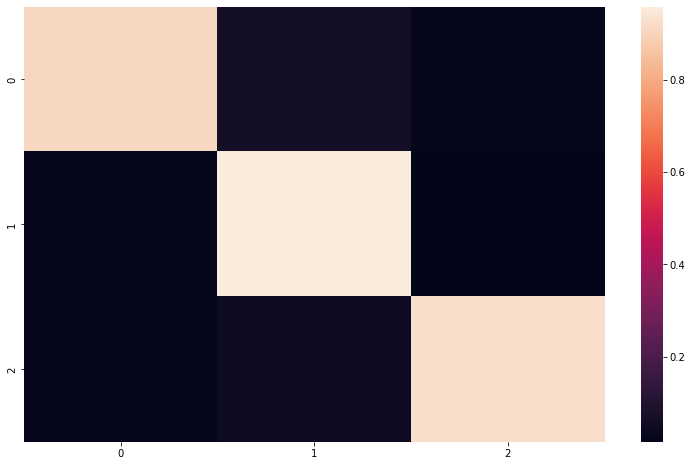

In [ ]:
# Plot confusion matrix
conf_mat = confusion_matrix(test_Y, predicted_classes, labels = name)

#Normalize confusion_matrix
conf_mat = conf_mat.astype('float')/ conf_mat.sum(axis=1)[:, np.newaxis]

# Plot Heat Map
fig , ax = plt.subplots()
fig.set_size_inches(13, 8)
sns.heatmap(conf_mat)

Automatically created module for IPython interactive environment
Confusion matrix, without normalization
[[ 918   64   30]
 [  28 1006   16]
 [  32   54 1079]]
Normalized confusion matrix
[[0.91 0.06 0.03]
 [0.03 0.96 0.02]
 [0.03 0.05 0.93]]


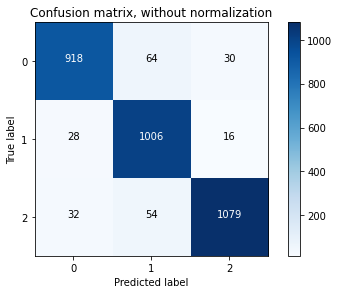

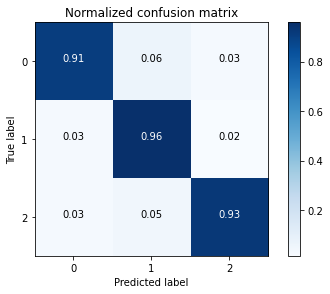

In [ ]:
print(__doc__)

import itertools
import numpy as np
import matplotlib.pyplot as plt

from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix


class_names = name

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=0)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Compute confusion matrix
cnf_matrix = confusion_matrix(test_Y, predicted_classes)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()